## 🧠 Objective
In this notebook, we demonstrate how to create a superposition and an entangled state using Qiskit. We use the Hadamard (H) and CNOT (CX) gates to build a Bell state:  
→ (|00⟩ + |11⟩) / √2

In [7]:
from qiskit import QuantumCircuit,transpile
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

## 🧱 Circuit Description
- H gate creates superposition on qubit 0.
- CX gate entangles qubit 0 and qubit 1.
- The result is a Bell state.

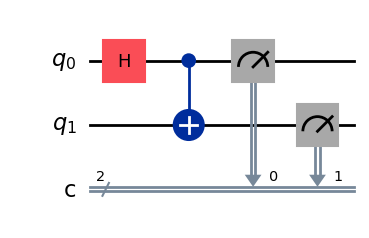

In [30]:
circuit = QuantumCircuit(2,2) # Create a quantum circuit with 2 qubits and 2 classical bits
circuit.h(0) # Apply a Hadamard gate on qubit 0 to create superposition
circuit.cx(0,1) # Applying CNOT Gate → control qubit: 0, target qubit: 1 (both start in |0⟩ state)
circuit.measure([0,1],[0,1]) # Measure both qubits and store the result in the corresponding classical bits
# The final state will collapse to either |00⟩ or |11⟩ with ~50% probability each
%matplotlib inline
# Draw the circuit and save the figure as a PNG image
figure = circuit.draw(output = 'mpl', filename='bell_circuit.png');

## 📈 Measurement Outcomes
The histogram should show high probabilities only for `00` and `11`, confirming entanglement.


Result: Result(backend_name='qasm_simulator', backend_version='0.17.0', job_id='0643e016-4d47-4a5b-85ea-2d98f2362391', success=True, results=[ExperimentResult(shots=1024, success=True, meas_level=2, data=ExperimentResultData(counts={'0x3': 512, '0x0': 512}), header={'creg_sizes': [['c', 2]], 'global_phase': 0.0, 'memory_slots': 2, 'n_qubits': 2, 'name': 'circuit-164', 'qreg_sizes': [['q', 2]], 'metadata': {}}, status=DONE, seed_simulator=12203077, metadata={'batched_shots_optimization': False, 'required_memory_mb': 0, 'method': 'stabilizer', 'active_input_qubits': [0, 1], 'device': 'CPU', 'remapped_qubits': False, 'num_qubits': 2, 'num_clbits': 2, 'time_taken': 0.00311, 'sample_measure_time': 0.0012297, 'input_qubit_map': [[0, 0], [1, 1]], 'max_memory_mb': 8022, 'measure_sampling': True, 'noise': 'ideal', 'parallel_shots': 1, 'parallel_state_update': 8, 'runtime_parameter_bind': False, 'num_bind_params': 1, 'fusion': {'enabled': False}}, time_taken=0.00311)], date=2025-04-08T20:45:04.0

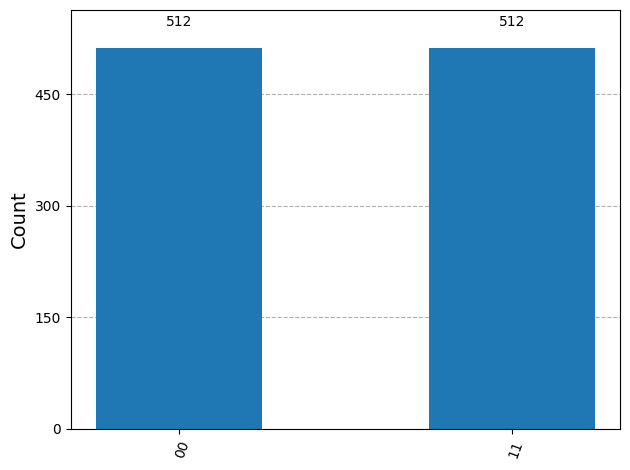

In [24]:
simulator = Aer.get_backend('qasm_simulator') # Use the QASM simulator backend from Qiskit Aer to simulate the circuit
transpiled_circuit = transpile(circuit,simulator) # Transpile the circuit to optimize it for the simulator
job = simulator.run(transpiled_circuit) 
result = job.result()
counts = result.get_counts()
print("Result:",result)
print("Counts:",counts)
plot_histogram(counts)
plt.show()